<a href="https://colab.research.google.com/github/SophiaSansur/Prediction-of-Product-Sales/blob/main/STARTER_Feature_Inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Starter Notebook] Feature Inspection Exercise (Practice)

- Student Name: Sophia Sansur



> This is a starter notebook for the Feature Inspection Exercise. Make sure to read the assignment instructions carefully before you start!

## EDA Functions from Lessons

### Univariate EDA Functions

In [1]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


### Multivariate Feature vs. Target Functions.

In [2]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='charges',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

# Your Work Here:

## Import Packages and Load Data

> Add as many code cells as you need!

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path='/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week04/cereal-kaggle-crawford-modified - sheet 1.csv'
df=pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       75 non-null     object 
 2   type      77 non-null     object 
 3   calories  72 non-null     float64
 4   protein   77 non-null     int64  
 5   fat       70 non-null     float64
 6   sodium    77 non-null     int64  
 7   fiber     71 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    71 non-null     float64
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     75 non-null     object 
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(8), int64(4), object(4)
memory usage: 9.8+ KB


In [6]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,NaN,4,1.0,130,10.0,5.0,6.0,280,25,top,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120.0,3,5.0,15,2.0,8.0,8.0,135,0,top,1.0,1.00,33.983679
2,All-Bran,K,C,70.0,4,1.0,260,9.0,7.0,5.0,320,25,top,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50.0,4,0.0,140,14.0,8.0,0.0,330,25,top,1.0,0.50,93.704912
4,Almond Delight,R,C,NaN,2,2.0,200,1.0,14.0,8.0,-1,25,NaN,1.0,0.75,34.384843


## Answer the following questions:

- Define your target column:
  - rating
- Is this a classification or regression task?
  - Regression because The target variable is continuous (numeric values)

## Inspecting Each Feature

>Tip: You will need to make a copy of the example cells below for every feature in the dataset.
- To make this easier you can copy and paste the template cells:
  - First, click on the example feature header cell below
    - Hold down the shift key while you scrol down to the last cell
    - While holding the shift key, left-click on the final cell at the bottom.
      - It should highlight all 7 cells at once.
  - Then Right-click and select "Copy Cells" to copy them.
  - To paste them, you must use the keyboard shortcut (Control + V on windows, Cmd + V) on Mac.


### Example: {Feature Name}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [7]:
# # Confirming the dtype to select correct EDA function
feature='type'
df[feature].dtype
# feature = ""
# df[feature].dtype

dtype('O')

/tmp/ipython-input-545264866.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


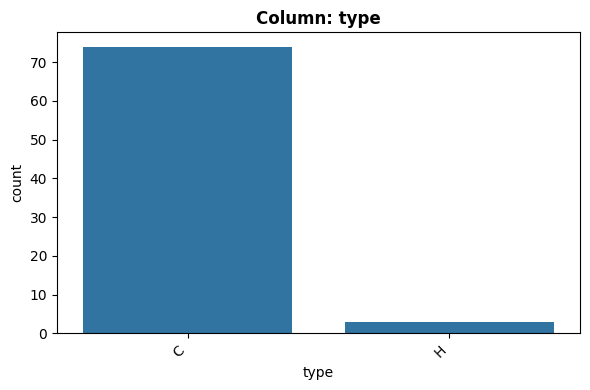

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'C' occurs 74 times (96.1%)
- Not constant or quasi-constant.


In [8]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - no

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



/tmp/ipython-input-1022906822.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


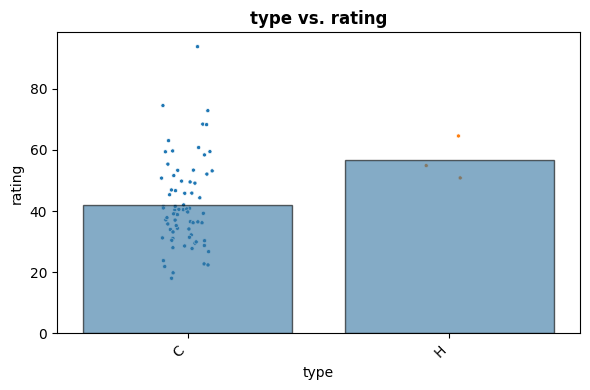

In [9]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'rating');


- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes
  - Does this feature appear to be a predictor of the target?
    - No because the sample size for hot cereal is too low.

___

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [10]:
# # Confirming the dtype to select correct EDA function
# feature = ""
# df[feature].dtype
feature='sugars'
df[feature].dtype

dtype('float64')

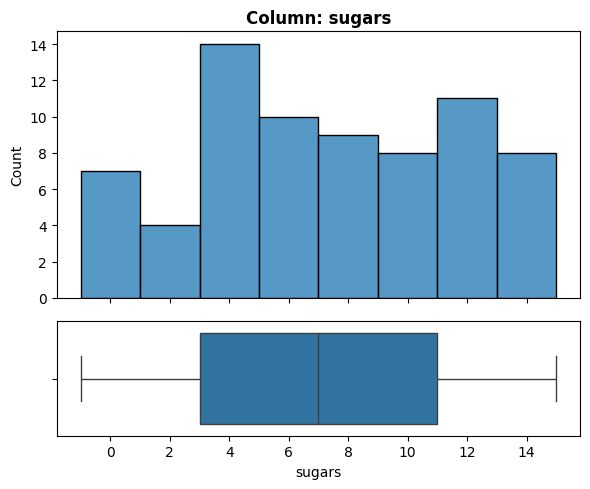

- NaN's Found: 6 (7.79%)
- Unique Values: 17
- Most common value: '3.0' occurs 13 times (16.88%)
- Not constant or quasi-constant.


In [11]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 6, 7.79%, impute with median

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - na

5. Would we know this BEFORE the target is determined?
  - yes
6. Is there a business case/understanding reason to exclude based on our business case?
  - no
  



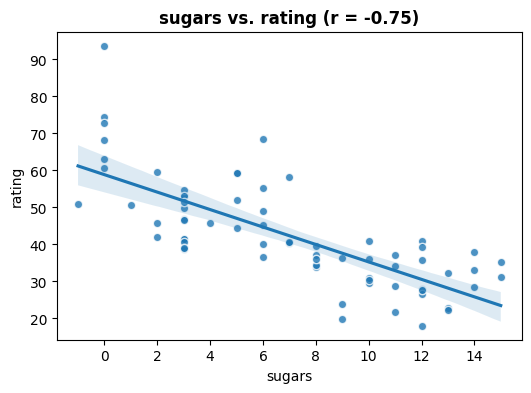

In [12]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes
  - Does this feature appear to be a predictor of the target?
    - yes

___

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [13]:
# # Confirming the dtype to select correct EDA function
# feature = ""
# df[feature].dtype
feature = "shelf"
df[feature].dtype

dtype('O')

/tmp/ipython-input-545264866.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


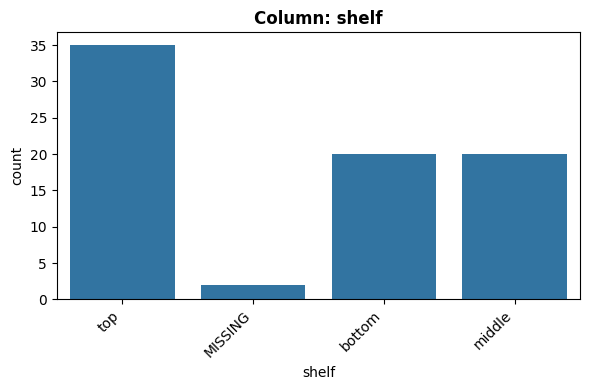

- NaN's Found: 2 (2.6%)
- Unique Values: 4
- Most common value: 'top' occurs 35 times (45.45%)
- Not constant or quasi-constant.


In [14]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2, (2.6%)
3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - 4, no

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



/tmp/ipython-input-1022906822.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


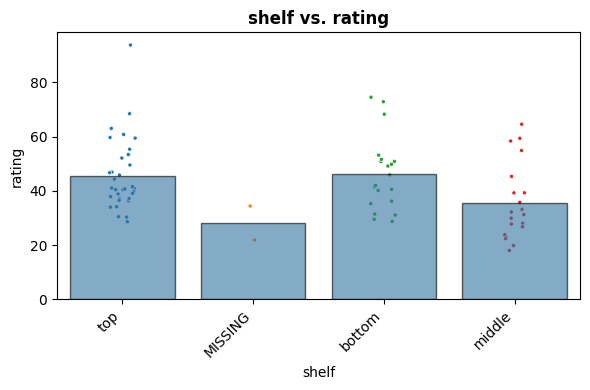

In [16]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - maybe
  - Does this feature appear to be a predictor of the target?
    - cereals in the middle shelf have lower rating.

___